In [1]:
import cv2
from matplotlib.animation import FuncAnimation, writers

In [2]:
import cv2
import os
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

datadir="../data"
cap = cv2.VideoCapture(os.path.join(datadir, "F2_1_1_2.ts"))
if not cap.isOpened():
    print("Cannot open camera")
frames = []
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame)
    # Display the resulting frame
# When everything done, release the capture
cap.release()

In /Users/lacemaker/anaconda3/envs/data_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/lacemaker/anaconda3/envs/data_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/lacemaker/anaconda3/envs/data_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/lacemaker/anaconda3/envs/data_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor rele

Can't receive frame (stream end?). Exiting ...


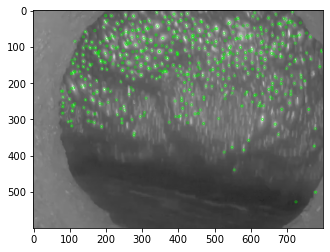

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv2.cvtColor(frames[0], cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
# Initiate ORB detector
#orb = cv.ORB_create()
# find the keypoints with ORB
#kp = orb.detect(img,None)
#kp = sift.detect(img,None)
kp, des = sift.detectAndCompute(img,None)
# compute the descriptors with ORB
# kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2);

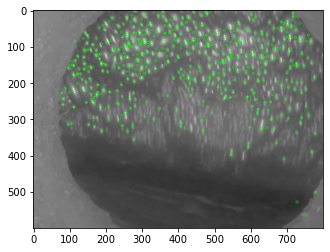

In [4]:
img = cv2.cvtColor(frames[1], cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
# Initiate ORB detector
#orb = cv.ORB_create()
# find the keypoints with ORB
#kp = orb.detect(img,None)
#kp = sift.detect(img,None)
kp1, des1 = sift.detectAndCompute(img,None)
# compute the descriptors with ORB
# kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp1, None, color=(0,255,0), flags=0)
plt.imshow(img2);

In [5]:
des.shape, des1.shape

((662, 128), (665, 128))

In [6]:
#sift = cv2.xfeatures2d.SIFT_create()

In [7]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=8)
knn.fit(des)

NearestNeighbors(n_neighbors=8)

In [8]:
dist, ids = knn.kneighbors(des1, return_distance=True)

(array([ 40.,  70.,  57.,  50.,  39.,  36.,  23.,  29.,  70., 251.]),
 array([0.06921352, 0.1622842 , 0.25535488, 0.34842557, 0.44149625,
        0.53456694, 0.6276376 , 0.72070825, 0.81377894, 0.9068496 ,
        0.9999203 ], dtype=float32),
 <BarContainer object of 10 artists>)

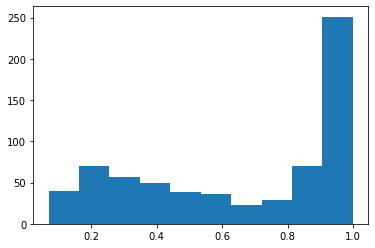

In [9]:
plt.hist(dist[:, 0]/dist[:, 1])

In [10]:
sel_ids = np.where(dist[:, 0]/dist[:, 1] < 0.6)[0]
old_ids = ids[sel_ids, 0]

old_points = np.stack([np.asarray(kp[i].pt) for i in old_ids])

In [11]:
new_points = np.stack([np.asarray(kp1[i].pt) for i in sel_ids])

In [12]:
np.where(np.sqrt(((new_points-old_points)**2).sum(1)) > 67)

(array([], dtype=int64),)

(-0.5, 799.5, 599.5, -0.5)

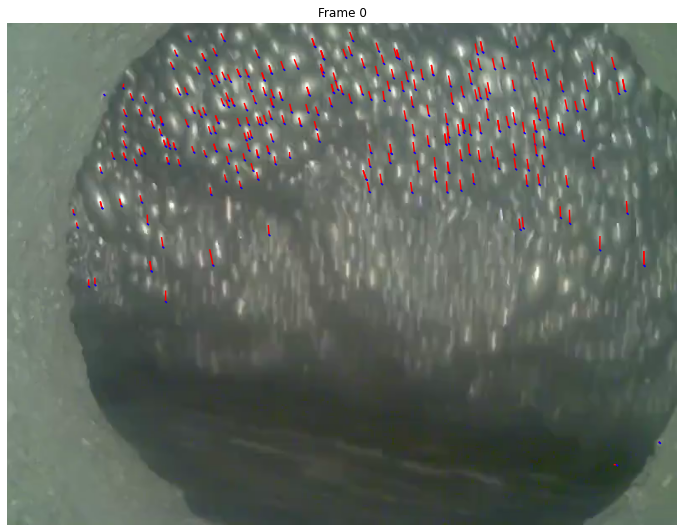

In [13]:
plt.figure(figsize=(6*2, 8*2))
frame = frames[0]
plt.imshow(frame, cmap="Greys", vmin=0, vmax=255)
for o, n in zip(old_points, new_points):
    #print(o)
    plt.plot([o[0], n[0]], [o[1], n[1]], color="red")
    plt.plot([n[0], n[0]+1], [n[1], n[1]+1], color="blue")
    #break
plt.title("Frame 0")
plt.axis("off")


(-0.5, 799.5, 599.5, -0.5)

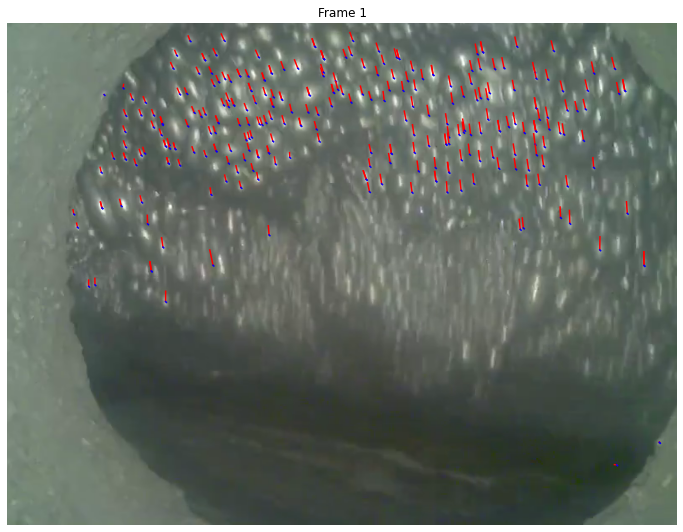

In [14]:
plt.figure(figsize=(6*2, 8*2))
frame = frames[1]
plt.imshow(frame, cmap="Greys", vmin=0, vmax=255)
for o, n in zip(old_points, new_points):
    #print(o)
    plt.plot([o[0], n[0]], [o[1], n[1]], color="red")
    plt.plot([n[0], n[0]+1], [n[1], n[1]+1], color="blue")
    #break
plt.title("Frame 1")
plt.axis("off")


In [15]:
new_points[102], old_points[102]

(array([304.07858276, 121.36483765]), array([301.38510132, 113.10946655]))

In [16]:
sel_ids[102], old_ids[102]

(234, 224)

In [17]:
dist[212]

array([136.29013, 203.60747, 211.87732, 212.04245, 218.93607, 219.05936,
       229.19643, 234.73602], dtype=float32)

In [18]:
dist[273]

array([213.31902, 234.86378, 239.70816, 255.89256, 264.3199 , 269.3028 ,
       271.67813, 275.12906], dtype=float32)

In [19]:
des1

array([[ 1.,  3., 34., ...,  3.,  3., 30.],
       [ 1.,  0.,  0., ...,  4.,  2.,  2.],
       [33.,  3.,  2., ...,  0.,  0.,  0.],
       ...,
       [35.,  0.,  0., ..., 27., 14.,  4.],
       [ 6., 23., 14., ...,  0.,  0.,  1.],
       [47., 11.,  2., ...,  0.,  0.,  1.]], dtype=float32)

In [20]:
dist[212, 0]/dist[212, 1]

0.66937685

In [21]:
dist

array([[138.72635, 268.60565, 288.15967, ..., 297.37854, 300.80725,
        301.83438],
       [152.4795 , 186.64673, 197.62843, ..., 204.19354, 210.40437,
        211.73805],
       [193.09583, 210.42339, 223.0269 , ..., 227.7345 , 228.29587,
        228.4907 ],
       ...,
       [168.91418, 175.10283, 176.67484, ..., 199.35898, 209.49463,
        210.1095 ],
       [158.97798, 368.577  , 379.19388, ..., 407.8713 , 418.63348,
        418.7553 ],
       [ 48.94895, 285.68338, 329.8439 , ..., 396.806  , 397.6946 ,
        397.83917]], dtype=float32)

In [22]:
def get_point_pairs(old_frame, new_frame):
    sift = cv2.xfeatures2d.SIFT_create()
    
    old_frame_ = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
    new_frame_ = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)
    kp0, des0 = sift.detectAndCompute(old_frame_, None)
    kp1, des1 = sift.detectAndCompute(new_frame_, None)
    
    from sklearn.neighbors import NearestNeighbors
    knn = NearestNeighbors(n_neighbors=8)
    knn.fit(des0)
    dist, ids = knn.kneighbors(des1, return_distance=True)
    
    sel_ids = np.where(dist[:, 0]/dist[:, 1] < 0.5)[0]
    old_ids = ids[sel_ids, 0]

    old_p = np.stack([np.asarray(kp0[i].pt) for i in old_ids])
    new_p = np.stack([np.asarray(kp1[i].pt) for i in sel_ids])
    return (old_p, new_p)

In [23]:
all_point_pairs = []
for old_frame, new_frame in tqdm_notebook(zip(frames, frames[1:50])):
    res = get_point_pairs(old_frame, new_frame)
    all_point_pairs.append(res)


/Users/lacemaker/anaconda3/envs/data_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


0it [00:00, ?it/s]

In [24]:
def draw_flux(i):
    old_points, new_points = all_point_pairs[i]
    #plt.figure(figsize=(6, 8))
    # frame0 = frames[i]
    plt.clf()
    frame = frames[i]
    plt.imshow(frame, cmap="Greys", vmin=0, vmax=255)
    for o, n in zip(old_points, new_points):
        #print(o)
        plt.plot([o[0], n[0]], [o[1], n[1]], color="red")
        plt.plot([n[0], n[0]+1], [n[1], n[1]+1], color="blue")
        #break
    plt.title(f"Frame {i}")
    plt.axis("off")
    


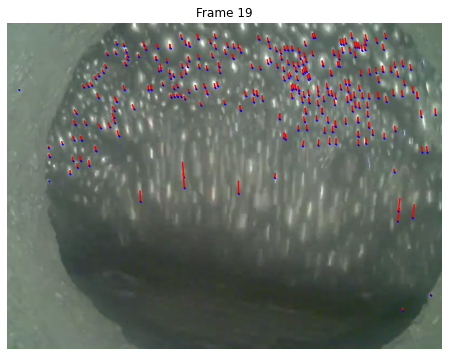

In [25]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
#ax.set_xlim(0, 1), 
ax.set_xticks([])
#ax.set_ylim(0, 1), 
ax.set_yticks([])
animation = FuncAnimation(fig, draw_flux, frames=np.arange(0, 20))
Writer = writers['ffmpeg']#['imagemagick']#
writer = Writer(fps=5, metadata={'artist': 'Me'})

animation.save('foambox_bubble.mp4', writer)